<a href="https://colab.research.google.com/github/hifsakazmi/AI-Bootcamp/blob/main/EDA_Aerofit_Treadmill.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA of Treadmill Buyer Profile

## 1 Project Details
The market research team at AeroFit wants to identify the characteristics of the target
audience for each type of treadmill offered by the company, to provide a better
recommendation of the treadmills to new customers. The team decides to investigate
whether there are differences across the product with respect to customer
characteristics.

## 2 Product Portfolio

*   The KP281 is an entry-level treadmill that sells for $1,500.

*   The KP481 is for mid-level runners and sells for $1,750.

*   The KP781 treadmill have advanced features, and it sells for $2,500.

## 3 Data Description
The company collected data on individuals who purchased a treadmill from the AeroFit
stores during the prior three months. The dataset in aerofit_treadmill_data.csv has the
following features:
* **Product** - product purchased: KP281, KP481, or KP781
* **Age** - in years
* **Gender** - male/female
* **Education** - in years
* **MaritalStatus** - single or partnered
* **Usage** - the average number of times the customer plans to use the treadmill
each week
* **Fitness** - self-rated fitness on a 1-5 scale, where 1 is the poor shape and 5 is the excellent shape
* **Income** - annual income in US dollars
* **Miles** - the average number of miles the customer expects to walk/run each week

## 4 Data Exploration and Processing

In [1]:
# Importing libraries required for analysis
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

### Importing data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = '/content/drive/MyDrive/Colab Notebooks/datasets/aerofit_treadmill_data.csv'

df = pd.read_csv(data)

### Preview the dataset

In [4]:
df.head(10)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
5,KP281,20,Female,14,Partnered,3,3,32973,66
6,KP281,21,Female,14,Partnered,3,3,35247,75
7,KP281,21,Male,13,Single,3,3,32973,85
8,KP281,21,Male,15,Single,5,4,35247,141
9,KP281,21,Female,15,Partnered,2,3,37521,85


Previewing the data we can that **Age**, **Education**, **Income** and **Miles** are **continuous**.

Whereas **Product**, **Gender**, **Marital Status**, **Usage** and **Fitness** are **discrete/categorical**.

### View dimensions of the dataframe

In [5]:
df.shape

(180, 9)

### Datatype of each column

In [6]:
df.dtypes

,0
Product,object
Age,int64
Gender,object
Education,int64
MaritalStatus,object
Usage,int64
Fitness,int64
Income,int64
Miles,int64


We can see that the dataset contains 3 object variables and 6 numerical variables

### Missing value detection

In [7]:
#Counting missing values in all columns
df.isna().sum()

,0
Product,0
Age,0
Gender,0
Education,0
MaritalStatus,0
Usage,0
Fitness,0
Income,0
Miles,0


There are no missing values in the data.

### Checking duplicate values in the dataset

In [8]:
#This command shows that there are no duplicates in this data
df.duplicated().sum()

0

There are no duplicated values in the data.

## 5 Statistical Summary

### Statistical summary of numeric variables

In [9]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


Findings
* Age: Average age of customers in **28 years** with a maximum age of **50 years**
* Education: Minimum education of customers is **12 years**.
* Income: Average annual income of customers is greater than **50k usd** with a minimum value greater than **25k usd**
* On average customers expect to use their treadmills **more than 3 times a week** and rate their fitness level **3 and above** on a scale of 1-5.

### Statistical summary of categorical variables

In [10]:
df.describe(include='O')

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,KP281,Male,Partnered
freq,80,104,107


Findings
*   Product: Most popular product is **KP281**
*   Gender: More than 50% of the customers are **Male**.
*   Marital Status: More than 50% of customers are **Partnered**



## 6 Non-Graphical Analysis

### Value Counts for all categorical features
* Product
* Gender
* Marital Status
* Usage
* Fitness

In [11]:
# Value counts of Product
df.Product.value_counts()

,count
Product,
KP281,80
KP481,60
KP781,40


In [12]:
# Value counts of Gener
df.Gender.value_counts()

,count
Gender,
Male,104
Female,76


In [13]:
# Value counts of Marital Status
df.MaritalStatus.value_counts()

,count
MaritalStatus,
Partnered,107
Single,73


In [14]:
# Value counts of Usage
df.Usage.value_counts()

,count
Usage,
3,69
4,52
2,33
5,17
6,7
7,2


In [15]:
# Value counts of Fitness
df.Fitness.value_counts()

,count
Fitness,
3,97
5,31
2,26
4,24
1,2


## 7 Graphical Analysis

### 7.1 Univariate Analysis - Numerical features

#### Age

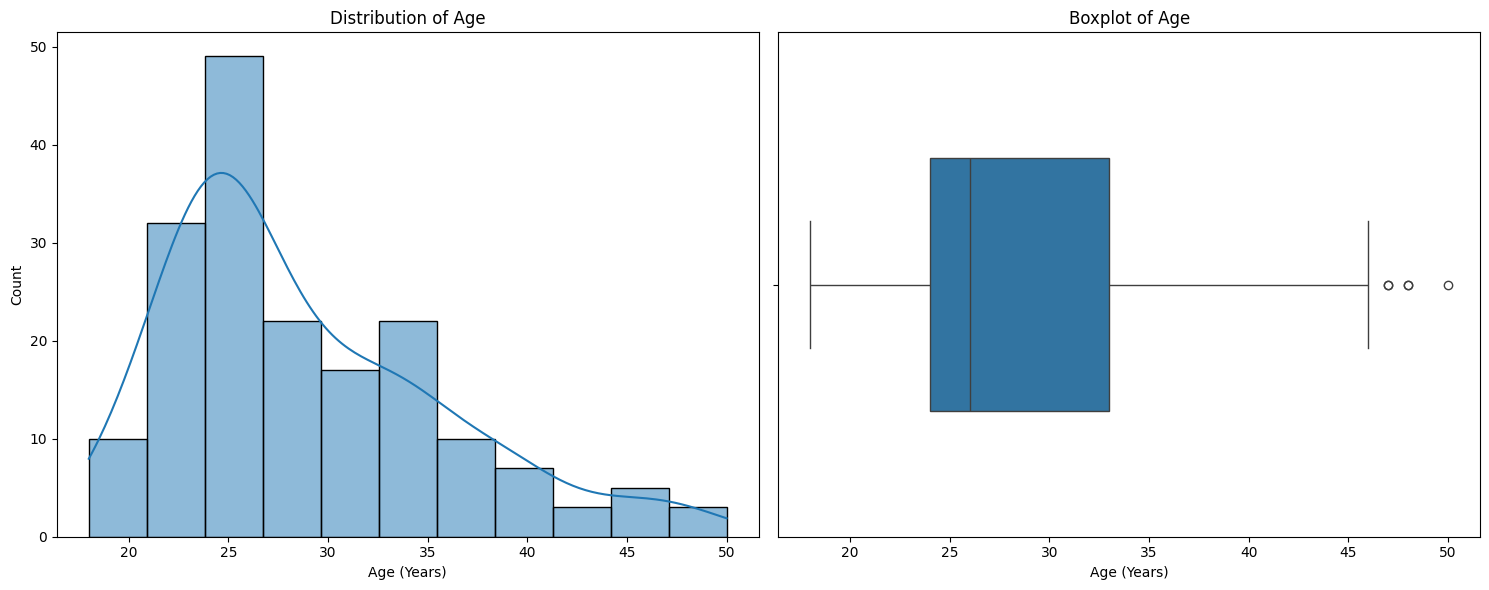

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
# Plot on the first subplot
sns.histplot(
    data=df,
    x='Age',
    kde=True,
    ax=ax[0]
)
ax[0].set_title('Distribution of Age')
ax[0].set_xlabel('Age (Years)')

# Plot on the second subplot
sns.boxplot(
    data=df,
    x='Age',
    width=0.5,
    ax=ax[1]
)
ax[1].set_title('Boxplot of Age')
ax[1].set_xlabel('Age (Years)')
plt.tight_layout()
plt.show()

These plots shows that Age distribution is **Right-skewed** with few outliers.

#### Education

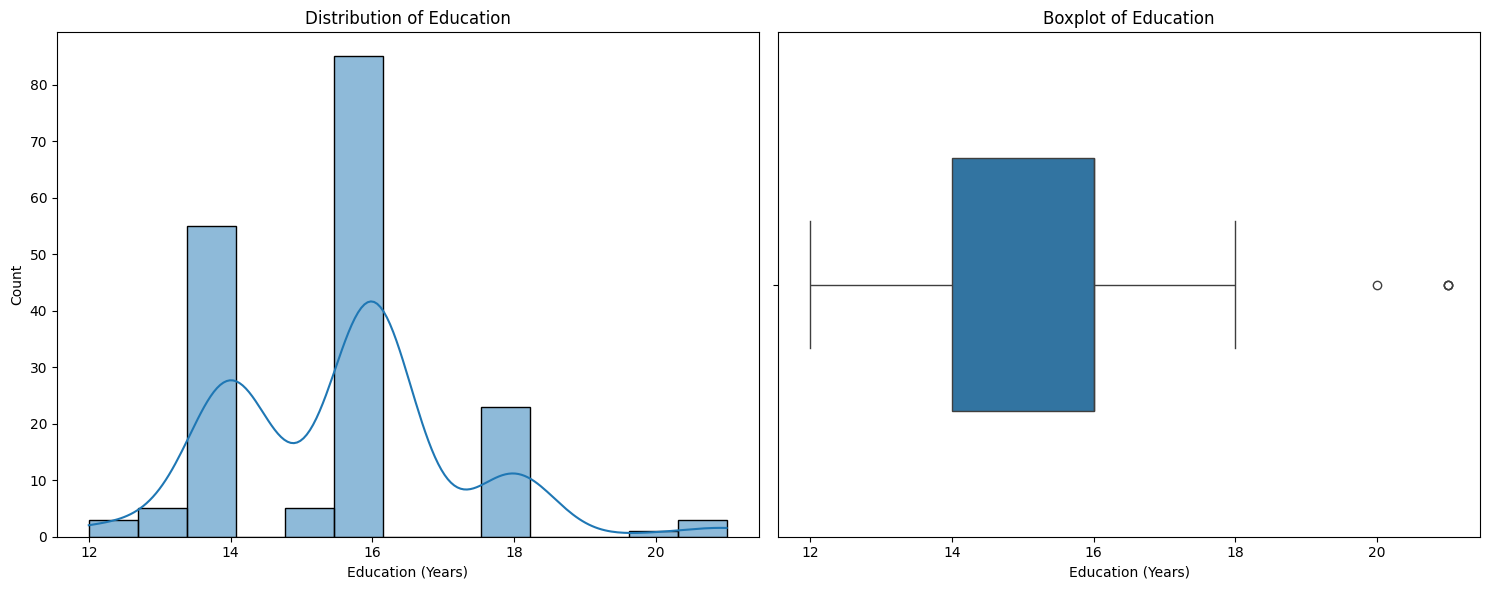

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
# Plot on the first subplot
sns.histplot(
    data=df,
    x='Education',
    kde=True,
    ax=ax[0]
)
ax[0].set_title('Distribution of Education')
ax[0].set_xlabel('Education (Years)')

# Plot on the second subplot
sns.boxplot(
    data=df,
    x='Education',
    width=0.5,
    ax=ax[1]
)
ax[1].set_title('Boxplot of Education')
ax[1].set_xlabel('Education (Years)')
plt.tight_layout()
plt.show()

**Observation:**
Distribution of Education shows that most of customers have 14 and 16 years of education.

#### Income

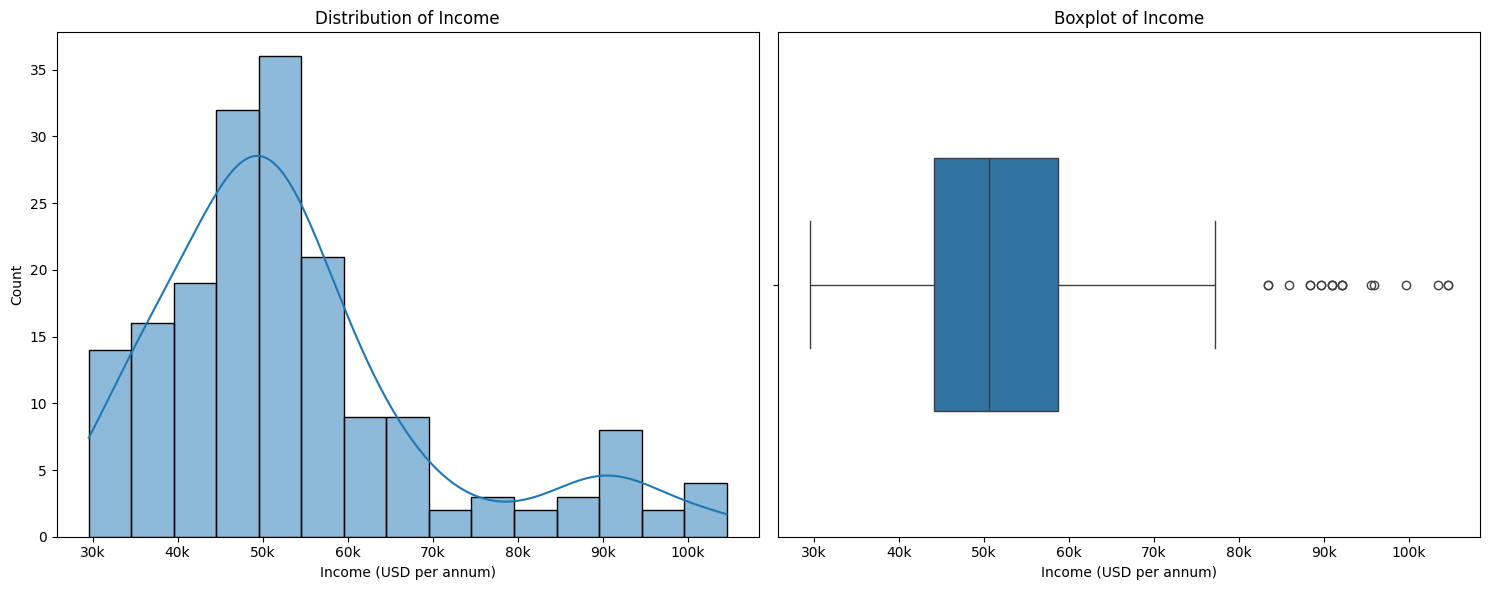

In [18]:
# Define the formatter function to format income on x-axis
def format_func(value, tick_number):
    return f'{int(value / 1000)}k'


fig, ax = plt.subplots(1, 2, figsize=(15, 6))
# Plot on the first subplot
sns.histplot(
    data=df,
    x='Income',
    kde=True,
    ax=ax[0]
)
ax[0].set_title('Distribution of Income')
ax[0].set_xlabel('Income (USD per annum)')
ax[0].xaxis.set_major_formatter(ticker.FuncFormatter(format_func))

# Plot on the second subplot
sns.boxplot(
    data=df,
    x='Income',
    width=0.5,
    ax=ax[1]
)
ax[1].set_title('Boxplot of Income')
ax[1].set_xlabel('Income (USD per annum)')
ax[1].xaxis.set_major_formatter(ticker.FuncFormatter(format_func))
plt.tight_layout()
plt.show()

**Observation:**
These plots indicates that Income is right-skewed with a high number of outliers.

#### Miles

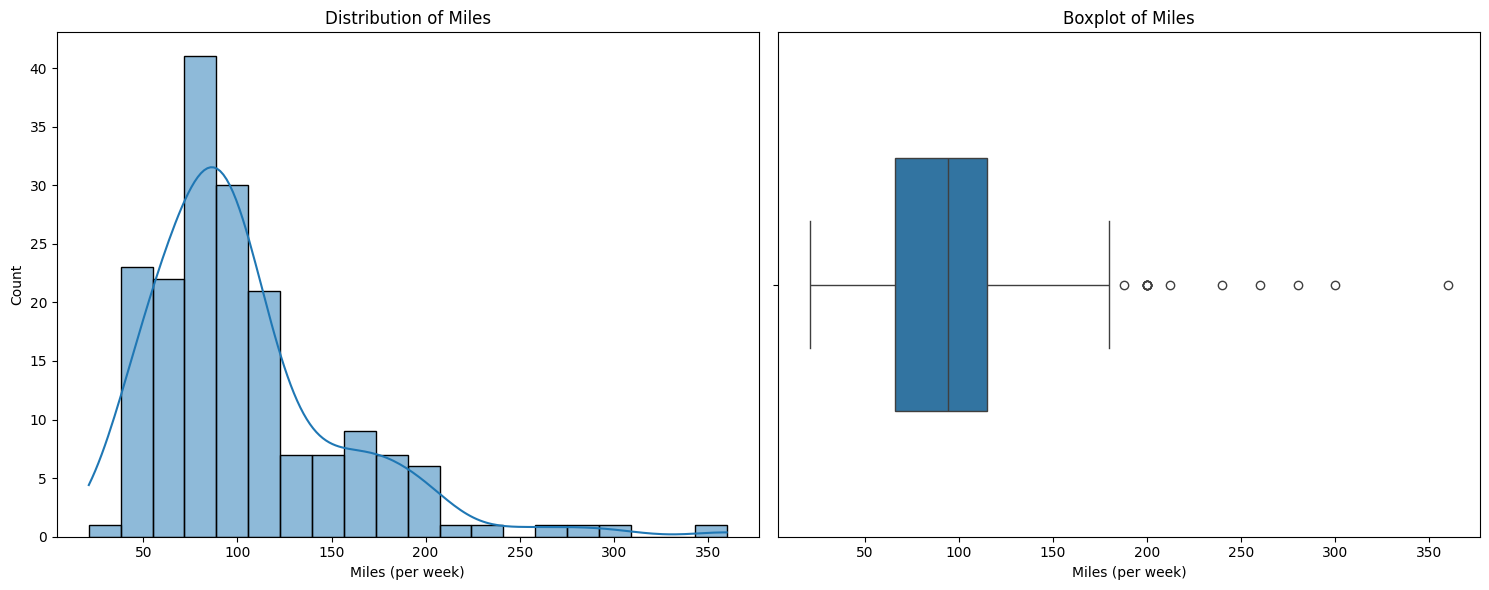

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
# Plot on the first subplot
sns.histplot(
    data=df,
    x='Miles',
    kde=True,
    ax=ax[0]
)
ax[0].set_title('Distribution of Miles')
ax[0].set_xlabel('Miles (per week)')

# Plot on the second subplot
sns.boxplot(
    data=df,
    x='Miles',
    width=0.5,
    ax=ax[1]
)
ax[1].set_title('Boxplot of Miles')
ax[1].set_xlabel('Miles (per week)')
plt.tight_layout()
plt.show()

### 7.2 Univariate Analysis - Categorical features

#### Product

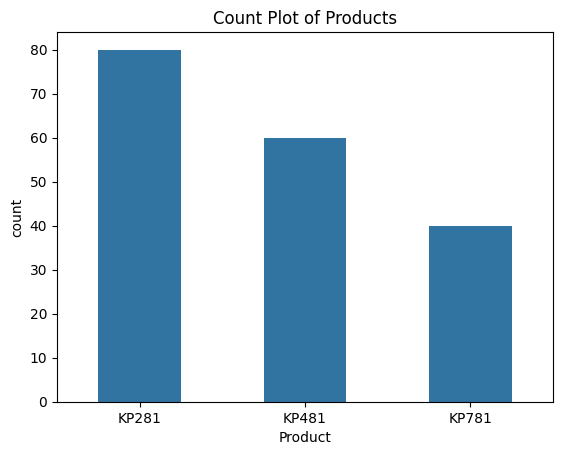

In [20]:
sns.countplot(
    data=df,
    x='Product',
    width = 0.5
)
plt.title("Count Plot of Products")
plt.show()

#### Gender


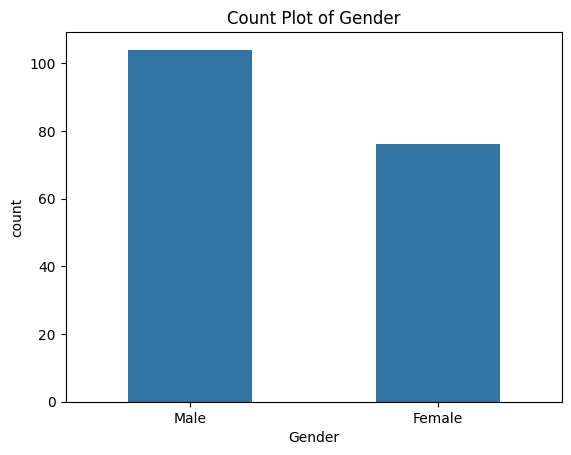

In [21]:
sns.countplot(
    data=df,
    x='Gender',
    width = 0.5
)
plt.title("Count Plot of Gender")
plt.show()

#### Marital Status


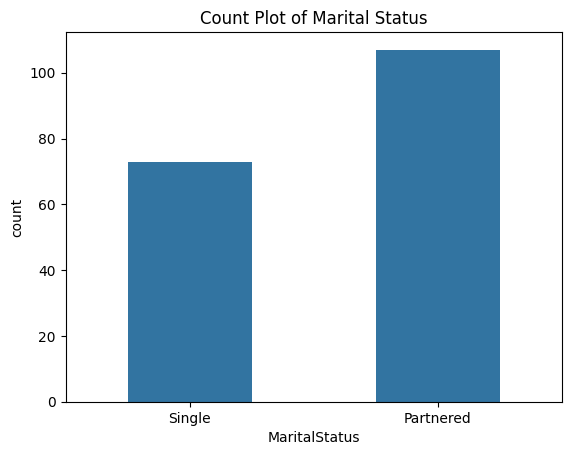

In [22]:
sns.countplot(
    data=df,
    x='MaritalStatus',
    width = 0.5
)
plt.title("Count Plot of Marital Status")
plt.show()

#### Usage

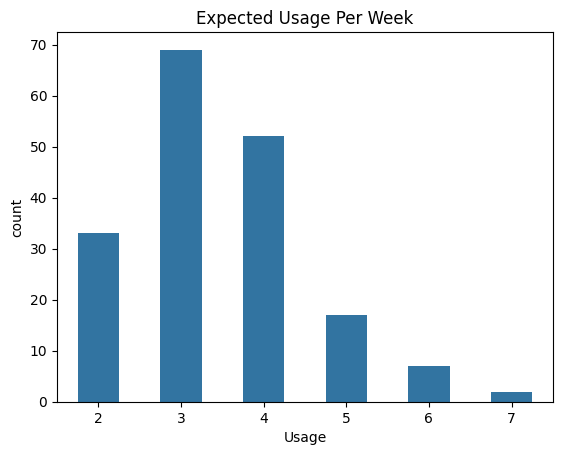

In [23]:
sns.countplot(
    data=df,
    x='Usage',
    width = 0.5
)
plt.title("Expected Usage Per Week")
plt.show()

#### Fitness

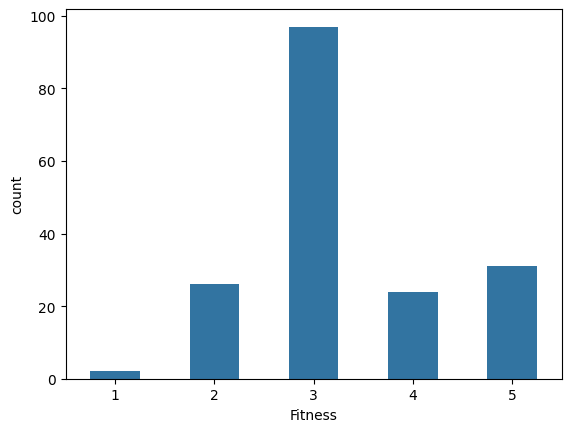

In [24]:
sns.countplot(
    data=df,
    x='Fitness',
    width = 0.5
)
plt.show()

### 7.3 Bivariate Analysis

#### Product vs Gender

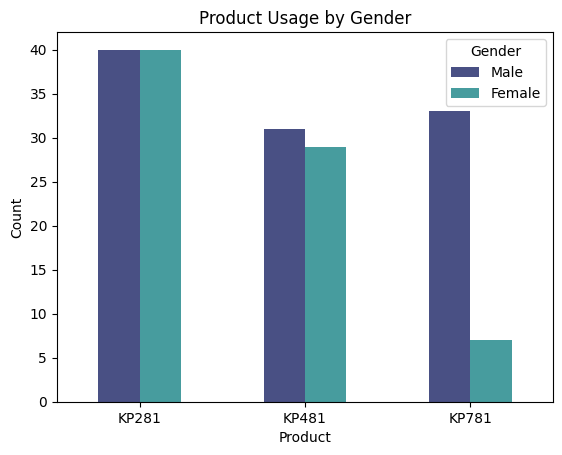

In [25]:
#plt.figure(figsize=(7, 5))
sns.countplot(
    data=df,
    x='Product',
    hue='Gender',
    palette='mako',
    width=0.5
)

# Customize the plot
plt.title('Product Usage by Gender')
plt.xlabel('Product')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

#### Product vs MaritalStatus


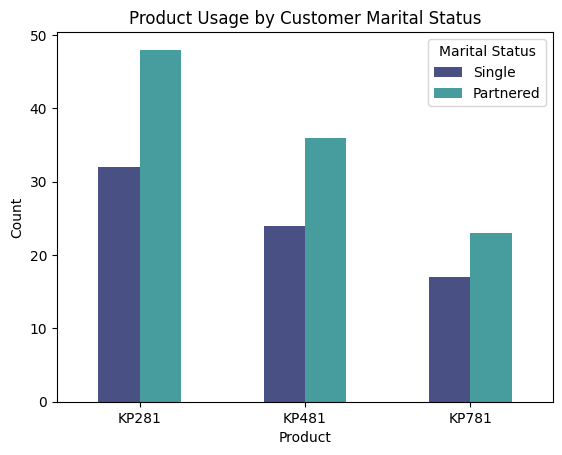

In [26]:
#plt.figure(figsize=(7, 5))
sns.countplot(
    data=df,
    x='Product',
    hue='MaritalStatus',
    palette='mako',
    width=0.5
)

# Customize the plot
plt.title('Product Usage by Customer Marital Status')
plt.xlabel('Product')
plt.ylabel('Count')
plt.legend(title='Marital Status')
plt.show()

#### Product vs Age

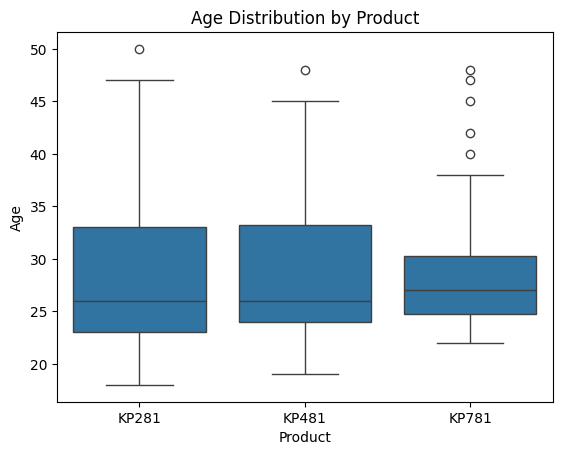

In [27]:
sns.boxplot(data=df, x='Product', y='Age')
plt.title('Age Distribution by Product')
plt.xlabel('Product')
plt.ylabel('Age')
plt.show()

## 7.4 Multivariate Analysis

Creating pairplots to show relationship of features

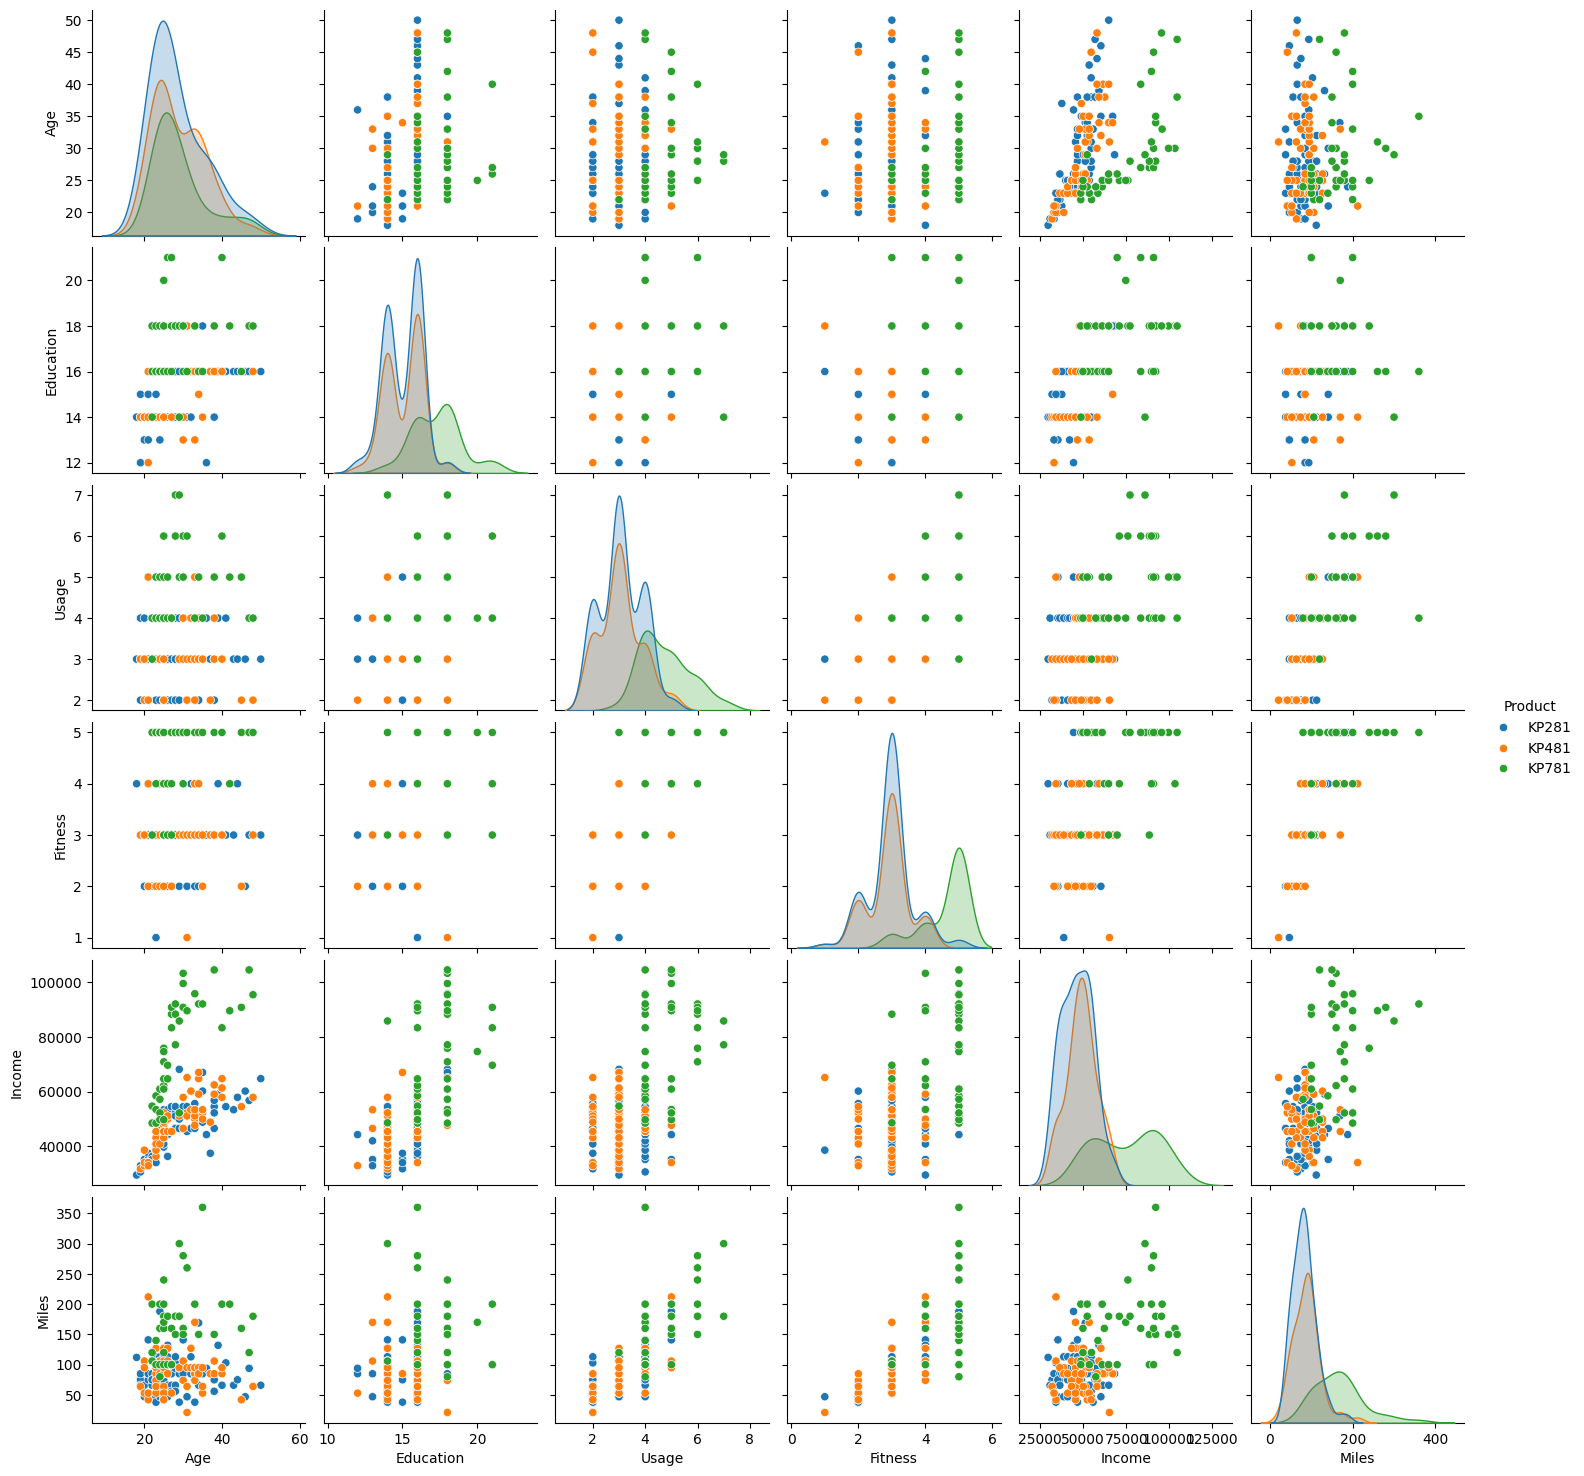

In [28]:
sns.pairplot(df, hue="Product")

plt.show()

## 8 Correlation Analysis

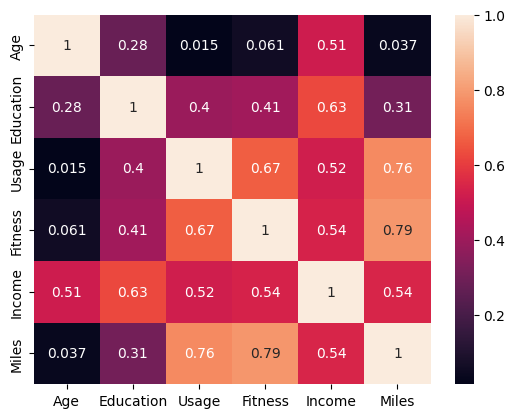

In [29]:

# Plotting correlation heatmap
dataplot = sns.heatmap(df.corr(numeric_only=True), annot=True)

# Displaying heatmap
plt.show()

## 9 Outlier Detection:

The interquartile range (IQR) is a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles, or between upper and lower quartiles, IQR = Q3 - Q1.

IQR score can be used to detect outliers in the data.

### 9.1 Outliers in Age

In [30]:
# find 1st Quartile
Q1 = df.Age.quantile(0.25)

# find 3rd Quartile
Q3 = df.Age.quantile(0.75)

# calculate IQR
IQR = Q3 - Q1

# define bounds
lower_age = Q1 - 1.5*IQR
upper_age = Q3 + 1.5*IQR

print("Age Outliers based on IQR score: \n\n")
age_outliers = df[(df.Age < lower_age) | (df.Age > upper_age)]
age_outliers

Age Outliers based on IQR score: 




,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
78,KP281,47,Male,16,Partnered,4,3,56850,94
79,KP281,50,Female,16,Partnered,3,3,64809,66
139,KP481,48,Male,16,Partnered,2,3,57987,64
178,KP781,47,Male,18,Partnered,4,5,104581,120
179,KP781,48,Male,18,Partnered,4,5,95508,180


### 9.2 Outliers in Education

In [31]:
# find 1st Quartile
Q1 = df.Education.quantile(0.25)

# find 3rd Quartile
Q3 = df.Education.quantile(0.75)

# calculate IQR
IQR = Q3 - Q1

# define bounds
lower_education = Q1 - 1.5*IQR
upper_education = Q3 + 1.5*IQR

print("Education Outliers based on IQR score: \n\n")
education_outliers = df[(df.Education < lower_education) | (df.Education > upper_education)]
education_outliers

Education Outliers based on IQR score: 




,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
156,KP781,25,Male,20,Partnered,4,5,74701,170
157,KP781,26,Female,21,Single,4,3,69721,100
161,KP781,27,Male,21,Partnered,4,4,90886,100
175,KP781,40,Male,21,Single,6,5,83416,200


### 9.3 Outliers in Income

In [32]:
# find 1st Quartile
Q1 = df.Income.quantile(0.25)

# find 3rd Quartile
Q3 = df.Income.quantile(0.75)

# calculate IQR
IQR = Q3 - Q1

# define bounds
lower_income = Q1 - 1.5*IQR
upper_income = Q3 + 1.5*IQR

print("Income Outliers based on IQR score: \n\n")
income_outliers = df[(df.Income < lower_income) | (df.Income > upper_income)]
income_outliers

Income Outliers based on IQR score: 




,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
159,KP781,27,Male,16,Partnered,4,5,83416,160
160,KP781,27,Male,18,Single,4,3,88396,100
161,KP781,27,Male,21,Partnered,4,4,90886,100
162,KP781,28,Female,18,Partnered,6,5,92131,180
164,KP781,28,Male,18,Single,6,5,88396,150
166,KP781,29,Male,14,Partnered,7,5,85906,300
167,KP781,30,Female,16,Partnered,6,5,90886,280
168,KP781,30,Male,18,Partnered,5,4,103336,160
169,KP781,30,Male,18,Partnered,5,5,99601,150
170,KP781,31,Male,16,Partnered,6,5,89641,260


### 9.4 Outliers in Miles

In [33]:
# find 1st Quartile
Q1 = df.Miles.quantile(0.25)

# find 3rd Quartile
Q3 = df.Miles.quantile(0.75)

# calculate IQR
IQR = Q3 - Q1

# define bounds
lower_miles = Q1 - 1.5*IQR
upper_miles = Q3 + 1.5*IQR

print("Miles Outliers based on IQR score: \n\n")
miles_outliers = df[(df.Miles < lower_miles) | (df.Miles > upper_miles)]
miles_outliers

Miles Outliers based on IQR score: 




,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
23,KP281,24,Female,16,Partnered,5,5,44343,188
84,KP481,21,Female,14,Partnered,5,4,34110,212
142,KP781,22,Male,18,Single,4,5,48556,200
148,KP781,24,Female,16,Single,5,5,52291,200
152,KP781,25,Female,18,Partnered,5,5,61006,200
155,KP781,25,Male,18,Partnered,6,5,75946,240
166,KP781,29,Male,14,Partnered,7,5,85906,300
167,KP781,30,Female,16,Partnered,6,5,90886,280
170,KP781,31,Male,16,Partnered,6,5,89641,260
171,KP781,33,Female,18,Partnered,4,5,95866,200


## 10 Conditional Probabilities

### 10.1 What percent of customers have purchased KP281, KP481, or KP781?

In [34]:
# Use value_counts on Product column to count customers
df_product_percent = (df['Product'].value_counts(normalize=True)).mul(100).round(2).astype(str) + '%'
df_product_percent

,proportion
Product,
KP281,44.44%
KP481,33.33%
KP781,22.22%


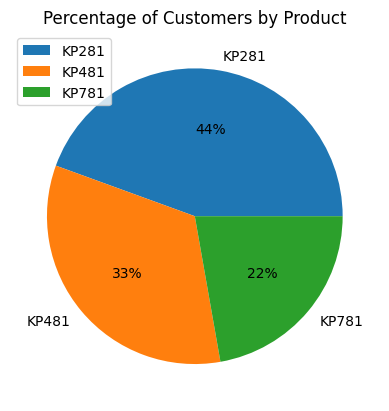

In [35]:
# Plot customer percentage as Pie chart
plt.pie(df['Product'].value_counts().values,
        labels=df['Product'].value_counts().index,
        autopct='%1.0f%%')
plt.legend()
plt.title("Percentage of Customers by Product")
plt.show()

### 10.2 Prdouct Frequency Tables

#### 10.2.1 Product - Gender

In [36]:
prod_gender_ft = pd.crosstab(df['Product'], df['Gender'], normalize='all', margins=True)
prod_gender_ft.rename(columns={'All': 'ColTotal'}, inplace=True)
prod_gender_ft

Gender,Female,Male,ColTotal
Product,,,
KP281,0.222222,0.222222,0.444444
KP481,0.161111,0.172222,0.333333
KP781,0.038889,0.183333,0.222222
All,0.422222,0.577778,1.000000


In [37]:
# Percentage of a Female customer purchasing KP781 treadmill
# P(KP781 | female) = P(KP781 AND female) / P(female)
p_kp781_female = (prod_gender_ft['Female']['KP781'] / prod_gender_ft['Female']['All']) * 100
p_kp781_female



9.210526315789473

In [38]:
# Probability of a customer being a Female given that Product is KP281
# Calculating probability with given formula:
# P(female | KP281) = P(female AND KP281) / P(KP281)
p_female_and_kp281 = prod_gender_ft[(prod_gender_ft.index == 'KP281')].Female
p_kp281 = prod_gender_ft[(prod_gender_ft.index == 'KP281')].ColTotal

p_female_given_kp281 = p_female_and_kp281 / p_kp281
print(f"Probability of a customer being female given the Product KP281: {p_female_given_kp281}")

Probability of a customer being female given the Product KP281: Product
KP281    0.5
dtype: float64


* Percentage of a Male customer purchasing a treadmill: **57.7%**
* Percentage of a Female customer purchasing KP781 treadmill: **9.2%**.
* Probability of a customer being a Female given that Product is
KP281: **50.0%**

#### 10.2.2 Product - Age

Percentage of customers with Age between 20s and 30s among all
customers

In [39]:
bins = [13, 19, 29, 39, 55]
labels = ['teens', '20s', '30s', '40+']
df2 = df.copy()
df2['AgeGroup'] = pd.cut(df2.Age, bins)
df2['AgeCategory'] = pd.cut(df2.Age, bins, labels = labels)

age_percent = round(len(df2[(df2.AgeCategory == '20s') | (df2.AgeCategory == '30s')]) / len(df2) * 100, 1)
age_percent

87.8

**Observation:** We can see the percentage of customers in their 20s and 30s is **87.8%**

#### 10.2.3 Product - Income

In [40]:
df.Income.describe()

,Income
count,180.000000
mean,53719.577778
std,16506.684226
min,29562.000000
25%,44058.750000
50%,50596.500000
75%,58668.000000
max,104581.000000


In [51]:
# find 1st Quartile for income
Q1 = df.Income.quantile(0.25)

# find 3rd Quartile
Q3 = df.Income.quantile(0.75)

# calculate percentage of low-income customer
low_income = round(len(df[df.Income <= Q1])/len(df) * 100, 1)
print(f"Percentage of low-income customer: {low_income}%")

# calculate high-income customers purchasing KP781
high_income_kp781 = round(len(df[(df.Income >= Q3) & (df.Product == 'KP781')]) / len(df) * 100, 1)
print(f"Percentage of high-income customers purchasing KP781: {high_income_kp781}%")

# Percentage of customer with high-income salary buying treadmill given that Product is KP781
pct_kp781_high = round(len(df[(df.Income >= Q3) & (df.Product == 'KP781')]) / len(df[df.Income >= Q3]) * 100, 1)
print(f"Percentage of customer with high-income salary buying treadmill given that Product is KP781: {pct_kp781_high}%")


Percentage of low-income customer: 25.0%
Percentage of high-income customers purchasing KP781: 16.1%
Percentage of customer with high-income salary buying treadmill given that Product is KP781: 64.4%


* Percentage of a low-income customer purchasing a treadmill: **25.0%**
* Percentage of a high-income customer purchasing KP781
treadmill: **16.1%**
* Percentage of customer with high-income salary buying treadmill
given that Product is KP781: **64.4%**

#### 10.2.4 Product - Fitness

In [43]:
prod_fitness_ft = pd.crosstab(df['Product'], df['Fitness'], margins=True)
prod_fitness_ft.rename(columns={'All': 'ColTotal'}, inplace=True)
prod_fitness_ft

Fitness,1,2,3,4,5,ColTotal
Product,,,,,,
KP281,1,14,54,9,2,80
KP481,1,12,39,8,0,60
KP781,0,0,4,7,29,40
All,2,26,97,24,31,180


In [46]:
# Percentage of customers that have fitness level 5
pct_customer_lvl5 = round(prod_fitness_ft[5]['All'] / prod_fitness_ft['ColTotal']['All'] * 100, 1)
pct_customer_lvl5

17.2

In [47]:
# Percentage of a customer with Fitness Level 5 purchasing KP781 treadmill
pct_lvl5_kp781 = round(prod_fitness_ft[5]['KP781'] / prod_fitness_ft['ColTotal']['All'] * 100, 1)
pct_lvl5_kp781

16.1

In [48]:
# Percentage of customer with fitness level 5 buying KP781 treadmill
pct_lvl5_in_kp781 = round(prod_fitness_ft[5]['KP781'] / prod_fitness_ft['ColTotal']['KP781'] * 100, 1)
pct_lvl5_in_kp781

72.5

* Percentage of customers that have fitness level 5: **17.2%**
* Percentage of a customer with Fitness Level 5 purchasing KP781
treadmill: **16.1%**
* Percentage of customer with fitness level 5 buying KP781
treadmill: **72.5%**

#### 10.2.5 Product - Marital Status

In [42]:
# Use value_counts on Product column to count customers
marital_status_percent = (df['MaritalStatus'].value_counts(normalize=True)).mul(100).round(2).astype(str) + '%'
marital_status_percent

,proportion
MaritalStatus,
Partnered,59.44%
Single,40.56%


**Observation:** Out of all treadmill users, **59.4% are Partnered** while **40.6%** are Single.

## 11 Insights and Recommendations

### 11.1 Insights



1. The best selling product is KP281 purchased by **44.4%** of the customers.
2. **87.8%** products are being purchased by customers in 20s and 30s.
3. **64.4%** high income customers purchase the high-end model KP781.




### 11.2 Recommendations

1. Model KP281 and KP481 should be marketed towards customers with income level below **60K**.
2. Model KP781 should be marketed as a premium product for high-income customers.